Import libraries

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Exploring Data

In [26]:
train_dataset = pd.read_csv("mnist_train.csv")
test_dataset = pd.read_csv("mnist_test.csv")

Head of data

In [27]:
train_dataset.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
test_dataset.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Data preprocessing

In [29]:
print(f"MNIST train set: \nThere is {train_dataset.shape[0]} rows and {train_dataset.shape[1]} columns.")

MNIST train set: 
There is 60000 rows and 785 columns.


In [30]:
print(f"MNIST test set: \nThere is {test_dataset.shape[0]} rows and {test_dataset.shape[1]} columns.")

MNIST test set: 
There is 10000 rows and 785 columns.


Empty fields

In [31]:
if train_dataset.isnull().any().any():
    df_null = dataset.isnull().sum().sum()
    print(f"There are empty fields in the dataset. Null Count in Data: {df_null}")
else:
    print("There are no empty fields in the train dataset.")

There are no empty fields in the train dataset.


In [32]:
if test_dataset.isnull().any().any():
    df_null = dataset.isnull().sum().sum()
    print(f"There are empty fields in the dataset. Null Count in Data: {df_null}")
else:
    print("There are no empty fields in the test dataset.")

There are no empty fields in the test dataset.


Duplicated fields

In [33]:
data_duplicates = train_dataset.duplicated()
sum_data_duplicates = train_dataset.duplicated().sum()
print(f"Duplicated fields: {sum_data_duplicates}")

Duplicated fields: 0


In [34]:
data_duplicates = test_dataset.duplicated()
sum_data_duplicates = test_dataset.duplicated().sum()
print(f"Duplicated fields: {sum_data_duplicates}")

Duplicated fields: 0


Info of the data

In [35]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to 28x28
dtypes: int64(785)
memory usage: 359.3 MB


In [36]:
test_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 785 entries, label to 28x28
dtypes: int64(785)
memory usage: 59.9 MB


Unique values

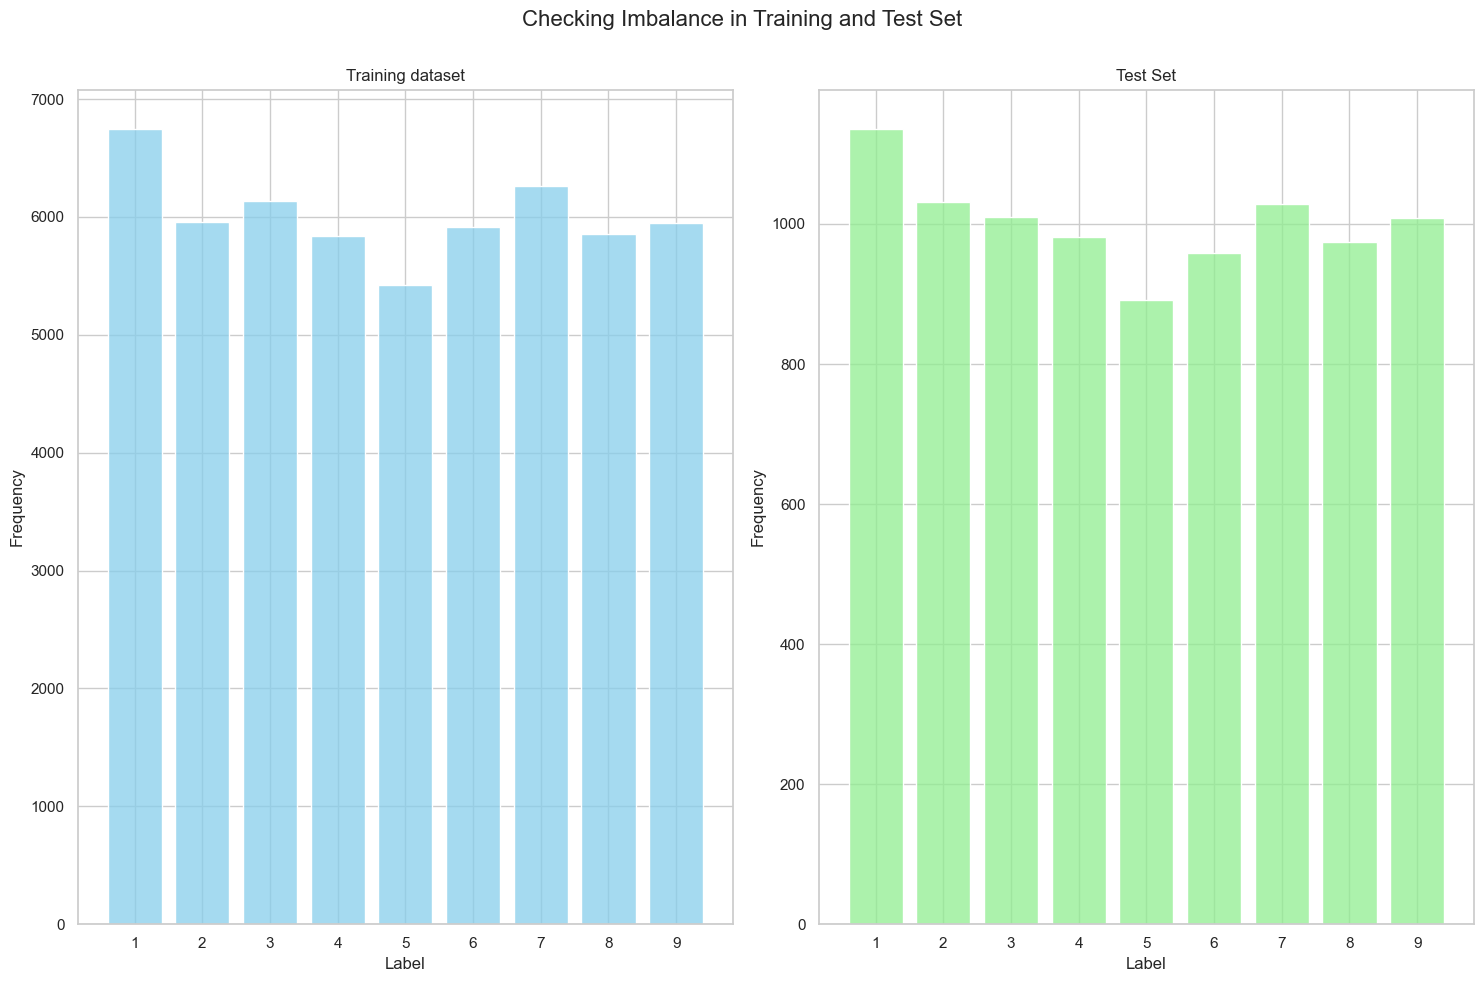

In [37]:
fig, axs = plt.subplots(1, 2, figsize=(15, 10))
bins = [i - 0.5 for i in range(1, 11)]
sns.histplot(train_dataset['label'], bins=bins, color='skyblue', ax=axs[0], shrink=.8)
axs[0].set_xlabel('Label')
axs[0].set_ylabel('Frequency')
axs[0].set_title('Training dataset')
axs[0].set_xticks(range(1, 10))

sns.histplot(test_dataset['label'], bins=bins, color='lightgreen', ax=axs[1], shrink=.8)
axs[1].set_xlabel('Label')
axs[1].set_ylabel('Frequency')
axs[1].set_title('Test Set')
axs[1].set_xticks(range(1, 10))

fig.suptitle('Checking Imbalance in Training and Test Set\n', fontsize=16)

plt.tight_layout()
plt.show()


/var/folders/kf/j2b1zr894399f2smxkl47kcw0000gn/T/ipykernel_20582/2347627884.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  indexes = filtered_df.groupby('label').apply(lambda x: x.index[0]).tolist()


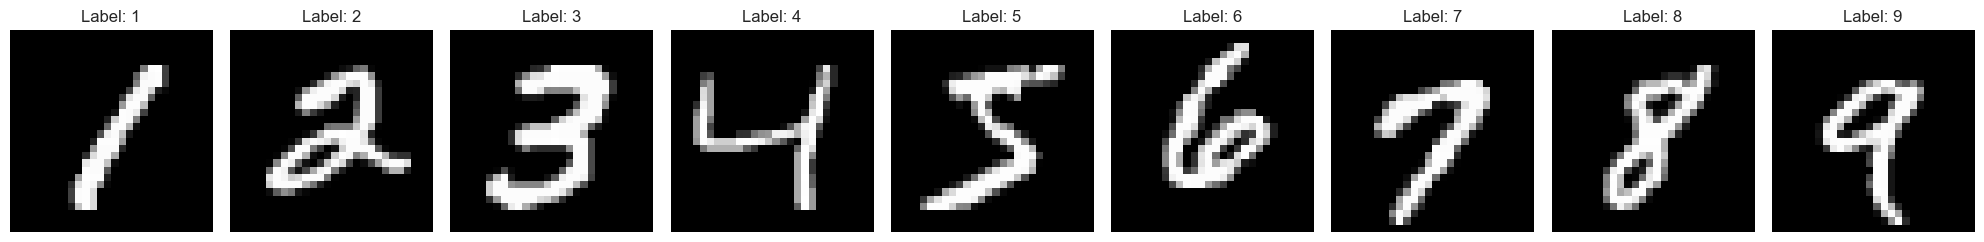

In [38]:
labels_to_find = [1, 2, 3, 4, 5, 6, 7, 8, 9]
filtered_df = train_dataset[train_dataset['label'].isin(labels_to_find)] #finding indexes of particular labels

indexes = filtered_df.groupby('label').apply(lambda x: x.index[0]).tolist()

fig, axes = plt.subplots(1, len(indexes), figsize=(20, 5))
for i, index in enumerate(indexes):
    image = train_dataset.iloc[index, 1:].values.reshape(28, 28)
    axes[i].imshow(image, cmap='gray')
    axes[i].set_title(f'Label: {train_dataset.iloc[index]["label"]}')
    axes[i].axis('off')
plt.tight_layout()
plt.show()

**Implementing Classification Models**

Splitting datasets into feature and label

In [39]:
X_train = train_dataset.iloc[:, 0:].values
y_train = train_dataset.iloc[:, 0].values

X_test = test_dataset.iloc[:, 0:].values
y_test = test_dataset.iloc[:, 0].values

Feature scaling

In [40]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8064 - loss: 4.3492 - val_accuracy: 0.9118 - val_loss: 0.4189
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9279 - loss: 0.3008 - val_accuracy: 0.9352 - val_loss: 0.2513
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9453 - loss: 0.1987 - val_accuracy: 0.9316 - val_loss: 0.2452
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9541 - loss: 0.1584 - val_accuracy: 0.9558 - val_loss: 0.1746
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9593 - loss: 0.1404 - val_accuracy: 0.9549 - val_loss: 0.1621
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9663 - loss: 0.1188 - val_accuracy: 0.9546 - val_loss: 0.1808
Epoch 7/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9690 - loss: 0.1109 - val_accuracy: 0.9617 - val_loss: 0.1592
Epoch 8/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9711 - loss: 0.0974 - 

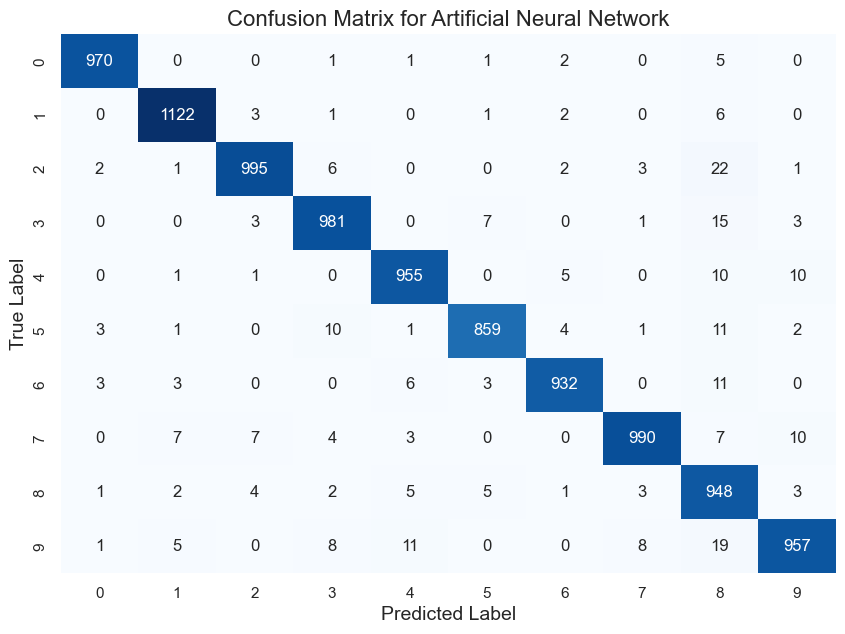

In [48]:
# Splitting datasets into feature and label (adjusted)
X_train = train_dataset.iloc[:, 1:].values  # Pixel values (excluding label)
y_train = train_dataset.iloc[:, 0].values   # Labels

X_test = test_dataset.iloc[:, 1:].values    # Pixel values (excluding label)
y_test = test_dataset.iloc[:, 0].values     # Labels

# One-hot encode the labels
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Reshape the data to be 28x28 pixels
X_train = X_train.reshape(-1, 28, 28)
X_test = X_test.reshape(-1, 28, 28)

# Define the ANN model
ann_classifier = Sequential()

# Add layers to the ANN
ann_classifier.add(Flatten(input_shape=(28, 28)))  # Flatten the input (28x28 pixels)
ann_classifier.add(Dense(units=128, activation='relu'))  # First hidden layer
ann_classifier.add(Dense(units=64, activation='relu'))  # Second hidden layer
ann_classifier.add(Dense(units=10, activation='softmax'))  # Output layer (10 classes)

# Compile the model
ann_classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
ann_classifier.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model on the test set
ann_loss, ann_accuracy = ann_classifier.evaluate(X_test, y_test)

# Print the accuracy
print(f"ANN Classifier Accuracy: {ann_accuracy * 100:.2f}%")

# Predicting the test set results
ann_y_pred = ann_classifier.predict(X_test)
ann_y_pred_classes = ann_y_pred.argmax(axis=-1)

# Plot confusion matrix for ANN
plot_confusion_matrix(y_test.argmax(axis=-1), ann_y_pred_classes, "Artificial Neural Network")
